# 22655141 Đường Chí Trung

# Bài 10

Từ bộ dữ liệu lưu lượng hành khách sử dụng dịch vụ hàng không qua các năm tại [international airline passengers](https://raw.githubusercontent.com/phamdinhkhanh/LSTM/master/international-airline-passengers.csv) bạn hãy:

1. Phân chia tập huấn luyện/kiểm tra sao cho tập kiểm tra bao gồm 12 tháng cuối cùng và tập huấn luyện gồm các tháng trước đó.
2. Xây dựng phương trình dự báo lưu lượng hành khách theo phương trình hồi qui tuyến tính đơn biến trên tập huấn luyện và đánh giá MSE trên tập kiểm tra.
3. Tạo thêm các biến $x^2, x^3$ và xây dựng phương trình hồi qui tuyến tính đa biến.
4. Huấn luyên mô hình với Ridge Regression và Lasso Regression. Fine tunning hệ số $\alpha$ của thành phần điều chuẩn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/phamdinhkhanh/LSTM/master/international-airline-passengers.csv')

In [3]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Bỏ giá trị NaN
df = df.dropna()

In [5]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           144 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# Đổi tên cột
df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'Quantity'}, inplace=True)
df.head()

,Month,Quantity
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
# Chuyển kiểu dữ liệu cho Month từ object sang datatime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
# df.set_index('Month', inplace=True)
df.head()

,Month,Quantity
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
# X đại diện cho Month
X = np.arange(len(df)).reshape(-1, 1)
y = df['Quantity'].values

In [10]:
print(f"X: {X}")
print(f"y: {y}")

X: [[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [1

In [11]:
df.columns

Index(['Month', 'Quantity'], dtype='object')

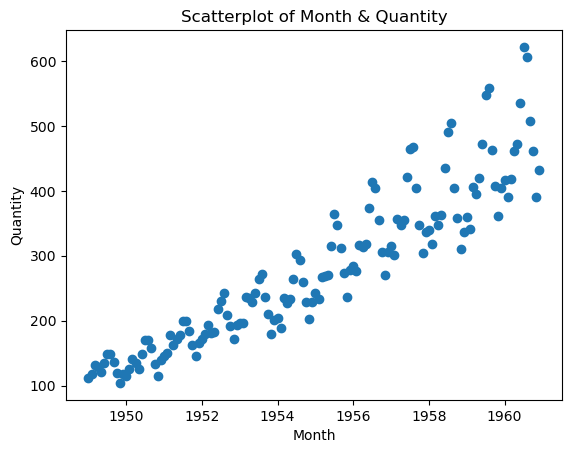

In [12]:
# Biểu đồ scatter
plt.plot(df['Month'], df['Quantity'], 'o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Scatterplot of Month & Quantity')
plt.show()

# Train

1. Phân chia tập huấn luyện/kiểm tra sao cho tập kiểm tra bao gồm 12 tháng cuối cùng và tập huấn luyện gồm các tháng trước đó.


In [13]:
df.shape

(144, 2)

In [14]:
len_df = len(df) - 12
X_train, X_test = X[:len_df], X[len_df:]
y_train, y_test = y[:len_df], y[len_df:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(132, 1)
(12, 1)
(132,)
(12,)


2. Xây dựng phương trình dự báo lưu lượng hành khách theo phương trình hồi qui tuyến tính đơn biến trên tập huấn luyện và đánh giá MSE trên tập kiểm tra.

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# Dự đoán và đánh giá MSE trên tập kiểm tra
y_pred = lin_reg.predict(X_test)
mse_single_var = mean_squared_error(y_test, y_pred)
print(f'MSE hồi quy tuyến tính đơn biến: {mse_single_var}')

MSE hồi quy tuyến tính đơn biến: 6213.022849638303


3. Tạo thêm các biến $x^2, x^3$ và xây dựng phương trình hồi qui tuyến tính đa biến.


In [17]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Hồi quy tuyến tính đa biến
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

# Dự đoán và tính MSE trên tập kiểm tra với hồi quy đa biến
y_pred_poly = lin_reg_poly.predict(X_test_poly)
mse_multi_var = mean_squared_error(y_test, y_pred_poly)
print(f'MSE hồi quy tuyến tính đa biến (x, x^2, x^3): {mse_multi_var}')

MSE hồi quy tuyến tính đa biến (x, x^2, x^3): 5663.456143470264


4. Huấn luyên mô hình với Ridge Regression và Lasso Regression. Fine tunning hệ số $\alpha$ của thành phần điều chuẩn.

In [18]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [19]:
# Ridge Regression
ridge = Ridge()
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train_poly, y_train)
best_ridge = ridge_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'MSE Ridge Regression: {mse_ridge} với alpha tốt nhất: {ridge_search.best_params_["alpha"]}')


MSE Ridge Regression: 5683.738509210457 với alpha tốt nhất: 100


In [20]:
# Lasso Regression
lasso = Lasso()
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train_poly, y_train)
best_lasso = lasso_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'MSE Lasso Regression: {mse_lasso} với alpha tốt nhất: {lasso_search.best_params_["alpha"]}')

MSE Lasso Regression: 6195.648847960224 với alpha tốt nhất: 100
